In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,Text,Polarity
0,আমাদের সজাগ থাকতে হবে টিকা নেওয়া নিয়ে।,1
1,ভ্যাকসিন ভালো না।,0
2,আমার পরিবারের সকলেই টিকা নিয়েছে।,1
3,টিকা লক্ষণীয় রোগ প্রতিরোধে একইভাবে উচ্চ কার্য...,1
4,অনলাইনে আবেদন করে আমি ভ্যাকসিন নিয়েছি।,1


In [4]:
df_shuffle = df.sample(frac = 1,random_state=42)
df_shuffle.head()

,Text,Polarity
1011,কেন্দ্রে প্রচণ্ড ভিড় থাকায় অনেকে ভেক্সিন পায...,0
3182,ভ্যাকসিন দিতে গিয়ে কোনরকম ঝামেলার সম্মুখীন হত...,1
3350,করোনার ভ্যাকসিনগুলি আপনাকে করোনায় অসুস্থ করতে ...,1
897,ভ্যাকসিন নিয়ে আমি ভালো আছি।,1
2293,টিকা ছাড়াও ভালো হয়।,0


In [5]:
df['Polarity'].value_counts()

1    2007
0    1800
Name: Polarity, dtype: int64

In [6]:
train_sentence,test_sentence,train_label,test_label = train_test_split(df_shuffle['Text'].to_numpy(),df_shuffle['Polarity'].to_numpy(),test_size=0.2,random_state=42)

In [7]:
train_sentence[:10]

array(['সময় মত ২য় ডোজ নিতে দেরি করলে মানুষ মারা যায়।',
       'টিকা নিতে হবে। টিকে থাকতে হবে এই মহামারীতে।',
       'টিকা নেওয়ার পর আমার জ্বর এসেছিলো। আমি মনে করি যে টিকাটি আমার শরীরের ঠিক কাজ করেছে।',
       'কিছু ধরণের COVID-19 ভ্যাকসিন মেসেঞ্জার RNA (mRNA) ব্যবহার করে তৈরি করা হয়েছে, এটি একটি নতুন প্রযুক্তি যা প্রচলিত পদ্ধতির ভ্যাকসিন তৈরির চেয়ে দ্রুত পদ্ধতির অনুমতি দেয়।',
       'আপনার কাছে যখন বিকল্প উপায়ে থাকে, তখন ভ্যাকসিন নেওয়ার কোনো প্রয়োজন নেই।',
       'ভেকসিনই একমাত্র উপায় নয় আরও অনেক উপায় আছে।',
       'সরকারের পক্ষ থেকে ইউনিয়নভিত্তিক টিকা প্রদানের যে পরিকল্পনা গ্রহণ করা হয়েছে সেখানে অনেক দুর্নীতি হচ্ছে। ',
       'টিকার জন্য নিবন্ধন করেছি কিন্তু আমার এসএমএস আসছে না',
       'আমি বিদেশ যাবো দেখে আগে আগেই টিকা নিয়ে নিছি। ',
       'টিকা গ্রহণের পর দুর্বল হয়ে যায় বা টিকা গ্রহণের পর লোকে মারা যায়, গ্রাম ও প্রত্যন্ত অঞ্চলে এই ধরণের লোকেদের ভুল বিশ্বাস ভাঙা উচিত বলেও জানিয়েছেন।'],
      dtype=object)

In [8]:
# visualize some random training examples

import random

random_index = random.randint(0,len(train_sentence) -5)

for row in df_shuffle[['Text','Polarity']][random_index:random_index+5].itertuples():
    _,text,polarity = row
    print(f"Target:{polarity}", "(Positive FeedBack)" if polarity > 0 else "(Negative FeedBack)")
    print(f"Text\n {text}\n")
    print("---\n")


Target:1 (Positive FeedBack)
Text
 ভ্যাকসিন দেওয়ার পর আমার করোনা হয়েছিল। কিন্তু আমি ভয় পাই নাই। 

---

Target:1 (Positive FeedBack)
Text
 টিকা দেওয়ার পর টিকার প্রতি আমার আস্থা আরো বাইড়া গেছে। 

---

Target:1 (Positive FeedBack)
Text
 এমন খবর আমাদের আশা জাগায়। আল্লাহ যেন খুব তাড়াতাড়ি মানুষকে করনার প্রতিরোধক বানানোর তৌফিক দান করেন।

---

Target:0 (Negative FeedBack)
Text
 মানুষ টিকা নিতে যায় কিন্তু টিকা পায়না। টিকা আছে টিকা নাই ! এমনই লুকোচুরি।

---

Target:0 (Negative FeedBack)
Text
 টিকা যদি করোনার চেয়ে ভয়ংকর হয়, তবে সেই টিকা না দেওয়াই উত্তম,,

---



In [9]:

len(train_sentence), len(train_label),len(test_sentence),len(test_label)

(3045, 3045, 762, 762)

In [10]:
import tensorflow as tf
from keras.layers.preprocessing.text_vectorization import TextVectorization
import numpy as np

text_vec = TextVectorization()

2023-02-24 10:22:12.304135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 10:22:22.353720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
average_word_per_sentence = round(sum(len(i.split()) for i in train_sentence)/len(train_sentence))

### Settings Parmaeters for TextVectorization




In [12]:
max_vocab_length = 10000
max_length = average_word_per_sentence
text_vectorized = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length)

In [13]:
text_vectorized.adapt(train_sentence)

In [14]:
sample_sentence = 'সময় মত ২য় ডোজ নিতে দেরি করলে মানুষ মারা যায়।'

text_vectorized([sample_sentence])

<tf.Tensor: shape=(1, 11), dtype=int64, numpy=array([[152, 498, 522,  10,  14, 672, 569,  33, 175, 189,   0]])>

In [15]:

random_sentence = random.choice(train_sentence)
print(f"Original text:\n\n{random_sentence}\n\n Vectorized version : {text_vectorized([random_sentence])}")

Original text:

পানি ছাড়া যেমন জীবন বাঁচে না। ভ্যাকসিন ছাড়াও দুইদিন পর জীবন বাঁচব না। 

 Vectorized version : [[ 665  263  923   92 1470    5    3 1624 4162   19   92]]


In [16]:


word_to_vocab = text_vectorized.get_vocabulary()

top_10_word = word_to_vocab[:10]
bottom_10_word = word_to_vocab[-10:]

print(f"Number of words in vocabulary {len(word_to_vocab)}\n")
print(f"Top 10 words : {top_10_word}")
print(f"Bottom 10 words : {bottom_10_word}")

Number of words in vocabulary 5201

Top 10 words : ['', '[UNK]', 'টিকা', 'ভ্যাকসিন', 'আমি', 'না।', 'না', 'করোনা', 'জন্য', 'এবং']
Bottom 10 words : ['c130j', 'astrazenecaএর', '95।', '95', '90', '6', '3', '25', '18', '10']


In [17]:
# making an embedding layer

from keras.layers import Embedding

embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    input_length=max_length,
   
)
embedding

In [18]:
random_sentence = random.choice(train_sentence)

print(f" Original Text :\n\n {random_sentence} \n\n Embedding Version : ")
sample_emb = embedding(text_vectorized([random_sentence])) 
sample_emb

 Original Text :

 মাানুষ সচেতন না হলে টিকা দিয়ে লাভ নাই। 

 Embedding Version : 


<tf.Tensor: shape=(1, 11, 128), dtype=float32, numpy=
array([[[ 0.00040514,  0.0157286 ,  0.02218987, ..., -0.04930102,
          0.01278706, -0.03304267],
        [ 0.04180029,  0.0301244 ,  0.00421367, ..., -0.04805496,
          0.00157603,  0.01386552],
        [-0.01765227,  0.03492648, -0.031906  , ..., -0.00794963,
         -0.02121862,  0.04849466],
        ...,
        [-0.0090967 , -0.04014095,  0.01273057, ...,  0.00811938,
         -0.00810473,  0.02266054],
        [-0.0090967 , -0.04014095,  0.01273057, ...,  0.00811938,
         -0.00810473,  0.02266054],
        [-0.0090967 , -0.04014095,  0.01273057, ...,  0.00811938,
         -0.00810473,  0.02266054]]], dtype=float32)>

In [19]:
sample_emb[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00040514,  0.0157286 ,  0.02218987,  0.01405368, -0.04198169,
        0.01280515,  0.01276313,  0.04872645,  0.00643039,  0.04390727,
       -0.01756152, -0.02866147,  0.02240548,  0.0118485 , -0.02381266,
        0.01913676,  0.02938152,  0.04291332, -0.04019962, -0.00014229,
       -0.03613544, -0.04749459, -0.03892427, -0.04134294, -0.04012786,
        0.03536117, -0.00488092, -0.02656083,  0.03896553,  0.01367425,
       -0.00323258, -0.03711738,  0.02927202,  0.04981292, -0.0138105 ,
       -0.02210587,  0.04762768, -0.00827495, -0.01489026, -0.00716293,
       -0.0065583 , -0.04048556, -0.01137036, -0.04873094, -0.01741589,
        0.03830868, -0.03490611, -0.01044104, -0.01272404,  0.02589441,
        0.01244932,  0.03989037, -0.0349943 , -0.04539686, -0.01276759,
       -0.04571275,  0.04184559,  0.00276812,  0.00515648,  0.00414021,
       -0.01710814, -0.03843886,  0.01013143,  0.03935924, -0.01871343,
       -0.011789

### Model 1 : Naive Bayes Classifier

In [20]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model_naive_bayes = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('multiNB',MultinomialNB())
])

model_naive_bayes.fit(train_sentence,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('multiNB', MultinomialNB())])

In [21]:
score = model_naive_bayes.score(test_sentence,test_label)
print(f'Our Naive Bayes accuracy: {score*100:.2f} %')

Our Naive Bayes accuracy: 66.80 %


In [22]:

# Prediction Test

naive_bayes_pred = model_naive_bayes.predict(test_sentence[:5])

naive_bayes_pred[:5], test_label[:5]

(array([0, 0, 0, 1, 0]), array([0, 0, 1, 0, 0]))

In [23]:
model_naive_bayes.predict([test_sentence[1]]),test_label[1]

(array([0]), 0)

In [24]:
rdint = random.randint(0,abs(len(test_sentence) -5))

for i,word in enumerate(test_sentence[rdint:rdint+5]):
  
    print(f"Text: {word}  pred: {model_naive_bayes.predict([word])[0]} original: {test_label[rdint+i+1]}\n\n")

Text: টিকার আওতায় সবাইকে না আনতে পারলে সংক্রমণ কমিয়ে আনা অনেক কঠিন ব্যাপার।  pred: 1 original: 0


Text: টিকা নিয়া কি লাভ বলেন। ১০০% সুরক্ষা তো নাই।  pred: 0 original: 1


Text: সবাই টিকা দিছে এবং সুস্থ থাকার জন্য প্রয়োজন এজন্যই আমিও টিকাটি দিব।  pred: 1 original: 0


Text: টিকা নেওয়ার পর আমার মামাকে করোনার উপসর্গে হাসপাতালে ভর্তি হতে হয়েছ।  pred: 1 original: 0


Text: টিকা নেওয়াতে আর ভয় হয়।  pred: 0 original: 0




In [25]:
# Calculate Accuracy

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
    model_accuracy = accuracy_score(y_true,y_pred) *100
    precision,recall,f1,_ = precision_recall_fscore_support(y_true,y_pred,average='weighted')
    model_result = {
        'accuracy':model_accuracy,
        'precision':precision,
        'recall':recall,
        'f1':f1
    }
    return model_result

In [26]:
calculate_results(model_naive_bayes.predict(test_sentence),test_label)

{'accuracy': 66.7979002624672,
 'precision': 0.6960798636606401,
 'recall': 0.6679790026246719,
 'f1': 0.6729967926241313}

In [27]:
import pickle
with open ('models/naive_bayes.pkl', 'wb') as f:
    pickle.dump(model_naive_bayes,f)

FileNotFoundError: [Errno 2] No such file or directory: 'models/naive_bayes.pkl'

In [28]:
def build_model( algorithm, train_sentence=train_sentence, train_label=train_label):
    model_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('Algorithum',algorithm)
    ])
    model_pipeline.fit(train_sentence,train_label)
    return model_pipeline
    

### Logistic   Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression = build_model(LogisticRegression())
model_logistic_regression.score(test_sentence,test_label)
calculate_results(model_logistic_regression.predict(test_sentence),test_label)

with open ('models/lr.pkl', 'wb') as f:
    pickle.dump(model_naive_bayes,f)

### Build Model with Random Forest, Gradient Boosting, XGBoost, LightGBM

In [41]:
from sklearn.svm import LinearSVC   
model_linear_svc = build_model(LinearSVC())
model_linear_svc.score(test_sentence,test_label)
calculate_results(model_linear_svc.predict(test_sentence),test_label)

{'accuracy': 66.14173228346458,
 'precision': 0.6624484936730389,
 'recall': 0.6614173228346457,
 'f1': 0.6616414616391161}

In [43]:

from sklearn.ensemble import RandomForestClassifier
model_random_forest = build_model(RandomForestClassifier())
model_random_forest.score(test_sentence,test_label)
calculate_results(model_random_forest.predict(test_sentence),test_label)
save_model(model_random_forest,filename='model_random_forest.pkl')

In [44]:

from sklearn.ensemble import GradientBoostingClassifier
model_gradient_boosting = build_model(GradientBoostingClassifier())
model_gradient_boosting.score(test_sentence,test_label)
calculate_results(model_gradient_boosting.predict(test_sentence),test_label)
save_model(model_gradient_boosting,filename='model_gradient_boosting.pkl')

In [45]:

from sklearn.ensemble import AdaBoostClassifier
model_adaboost = build_model(AdaBoostClassifier())
model_adaboost.score(test_sentence,test_label)
calculate_results(model_adaboost.predict(test_sentence),test_label)
save_model(model_adaboost,filename='model_adaboost.pkl')

In [46]:

from sklearn.ensemble import ExtraTreesClassifier
model_extra_tree = build_model(ExtraTreesClassifier())
model_extra_tree.score(test_sentence,test_label)
calculate_results(model_extra_tree.prsedict(test_sentence),test_label)s
save_model(model_extra_tree,filename='model_extra_tree.pkl')

In [ ]:

from sklearn.ensemble import BaggingClassifier
model_bagging = build_model(BaggingClassifier())
model_bagging.score(test_sentence,test_label)
calculate_results(model_bagging.predict(test_sentence),test_label)


{'accuracy': 66.01049868766404,
 'precision': 0.6609413032437741,
 'recall': 0.6601049868766404,
 'f1': 0.6601945618874624}

In [33]:

from sklearn.neighbors import KNeighborsClassifier
model_knn = build_model(KNeighborsClassifier())
model_knn.score(test_sentence,test_label)
calculate_results(model_knn.predict(test_sentence),test_label)


{'accuracy': 56.03674540682415,
 'precision': 0.7169998975592242,
 'recall': 0.5603674540682415,
 'f1': 0.5967490612916128}

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model_decision_tree = build_model(DecisionTreeClassifier())
model_decision_tree.score(test_sentence,test_label)
calculate_results(model_decision_tree.predict(test_sentence),test_label)


{'accuracy': 63.25459317585301,
 'precision': 0.6325459317585301,
 'recall': 0.6325459317585301,
 'f1': 0.6325459317585301}

In [36]:
# make a function to save model

def save_model(model,filename):
    with open(f'models/{filename}.pkl','wb') as f:
        pickle.dump(model,f)

save_model(model_naive_bayes,'naive_bayes')

NameError: name 'plot_confusion_matrix' is not defined

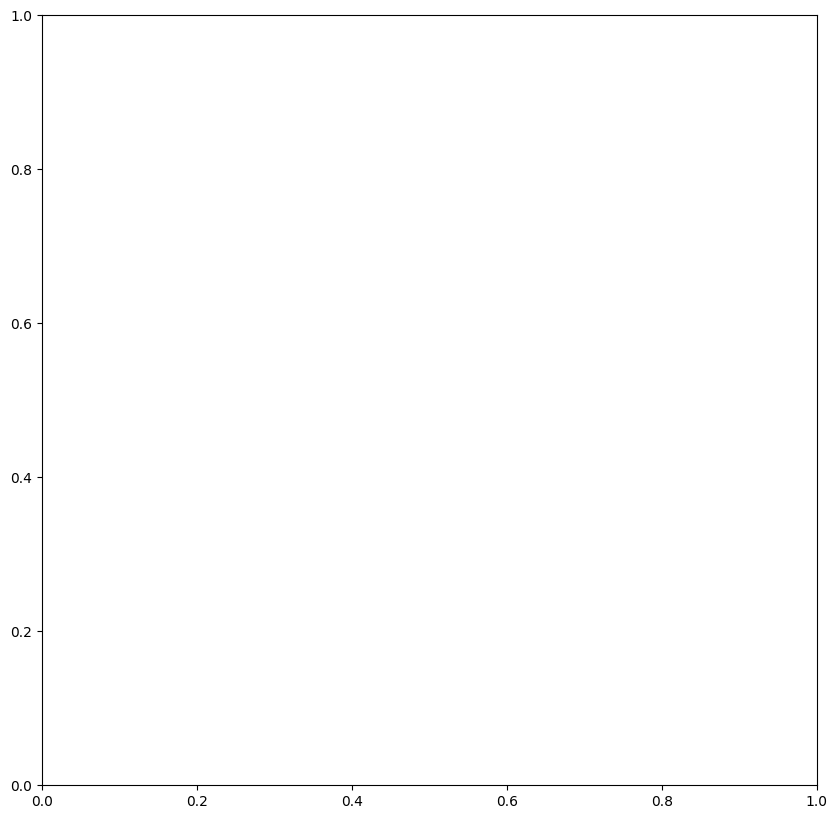

In [37]:

# make a function to visualize the model
import matplotlib.pyplot as plt

def visualize_model(model, model_name):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, test_sentence, test_label, ax=ax, cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

visualize_model(model_naive_bayes, 'Naive Bayes')

In [ ]:
class BuildModel():

    def __init__(self,train_sentence,train_label,test_sentence,test_label,algo) -> None:
        self.train_sentence = train_sentence
        self.train_label = train_label
        self.test_sentence = test_sentence
        self.test_label = test_label
        self.algo = algo

    
    def run(self):
        self.build_model()
        self.score()
        return self.calculate_results()

    def build_model(self):
        self.model = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('algo',algo)
        ])
        return self.model.fit(self.train_sentence,train_label)
    
    def score(self):
        return self.model.score(test_sentence,test_label)

    def calculate_results(self):
        y_true = test_label
        y_pred = self.model.predict(test_sentence)
        model_accuracy = accuracy_score(y_true,y_pred) *100
        precision,recall,f1,_ = precision_recall_fscore_support(y_true,y_pred,average='weighted')
        model_result = {
            'accuracy':model_accuracy,
            'precision':precision,
            'recall':recall,
            'f1':f1
        }
        return model_result

        

In [ ]:
# Building Neural Network 
import keras as ks
from keras import layers,Model

input = layers.Input(shape=(1,), dtype="string")
x = text_vectorized(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1, activation="sigmoid")(x)
nn_model = Model(input,output)

In [ ]:
nn_model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [ ]:
nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 11)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [ ]:
nn_history = nn_model.fit(train_sentence,train_label, epochs=5, )

Epoch 1/5
96/96 [==============================] - 4s 29ms/step - loss: 0.6708 - accuracy: 0.6851
Epoch 2/5
96/96 [==============================] - 3s 28ms/step - loss: 0.5660 - accuracy: 0.8115
Epoch 3/5
96/96 [==============================] - 3s 28ms/step - loss: 0.4464 - accuracy: 0.8496
Epoch 4/5
96/96 [==============================] - 3s 28ms/step - loss: 0.3609 - accuracy: 0.8729
Epoch 5/5
96/96 [==============================] - 3s 27ms/step - loss: 0.3019 - accuracy: 0.8943


In [ ]:

nn_pred = tf.squeeze(tf.round(nn_model.predict(test_sentence))) 

24/24 [==============================] - 0s 3ms/step


In [ ]:
calculate_results(test_label,nn_pred)

{'accuracy': 77.42782152230971,
 'precision': 0.7768009181492118,
 'recall': 0.7742782152230971,
 'f1': 0.7735962055713774}

In [ ]:
nn_model.save('models/nn_model')

INFO:tensorflow:Assets written to: models/nn_model/assets


INFO:tensorflow:Assets written to: models/nn_model/assets


In [38]:
save_model(model_logistic_regression,'model_logistic_regration.pkl')

In [40]:
# save_model(model_random_forest,'model_random_forest.pkl')
save_model(model_linear_svc,'model_linear_svc.pkl')
save_model(model_adaboost,'model_adaboot.pkl')
save_model(model_gradient_boosting,'model_gradient_boosting.pkls')
save_model(model_extra_tree,'model_extra_tree.pkl')


NameError: name 'model_adaboost' is not defined